In [30]:
# Setup

# For UV users [ Remove uv for normal pip users ]
!uv pip install ultralytics matplotlib numpy opencv-python supervision dotenv google-genai
!pip install -U -q google-genai

%load_ext dotenv
%dotenv

Audited 7 packages in 15ms


The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\sapha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [41]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import supervision as sv
import os

import google.genai as genai
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageColor
import json
import random

import io
import requests
from io import BytesIO

In [32]:
GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")

In [33]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [34]:
model_name = "gemini-2.0-flash"

In [147]:
bounding_box_system_instructions = """
    Return a JSON array with labels. Never return masks or code fencing. Limit to 100 objects.
    If an object is present multiple times, ignore them. Look for unique items in the space.
      """

In [148]:
safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

In [149]:
def random_hex_color():
  random_number = random.randint(0, 16777215)
  hex_color = hex(random_number)[2:].upper().zfill(6)
  return f"#{hex_color}"
random_hex_color()

'#2EDF70'

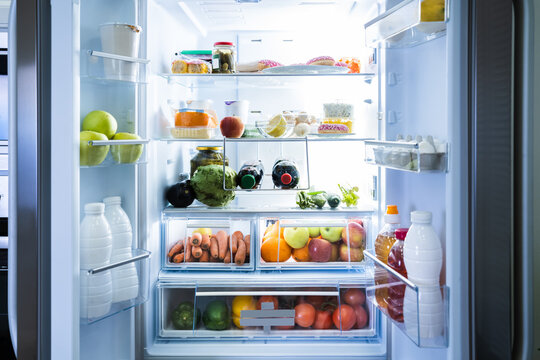

In [150]:
IMAGE_PATH = "images/fridge_example_1.jpg"
image = Image.open(IMAGE_PATH)
image

In [156]:
prompt = "Detect food items in a fridge or kitchen environment (with “label” as specific item name”). Do not repeat the same item. Look all over the image. Name them in a way " 

In [157]:
response = client.models.generate_content(
    model=model_name,
    contents=[prompt, image],
    config = types.GenerateContentConfig(
        system_instruction=bounding_box_system_instructions,
        temperature=0,
        safety_settings=safety_settings,
    )
)

In [158]:
def parse_json(json_output):
    # Parsing out the markdown fencing
    lines = json_output.splitlines()
    for i, line in enumerate(lines):
        if line == "```json":
            json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
            json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
            break  # Exit the loop once "```json" is found
    return json_output

In [159]:
bboxes = json.loads(parse_json(response.text))
bboxes

[{'label': 'milk'},
 {'label': 'apple'},
 {'label': 'carrot'},
 {'label': 'orange'},
 {'label': 'tomato'},
 {'label': 'lemon'},
 {'label': 'lettuce'},
 {'label': 'pickle'},
 {'label': 'cake'},
 {'label': 'doughnut'},
 {'label': 'egg'},
 {'label': 'oil'},
 {'label': 'lime'}]